#### La mayoría de la radiación interestelar proviene de luz emitida por las estrellas más masivas (tipo O). El número aproximado de estas estrellas en la Vía Láctea es $N_{O^*} \approx 5 \times 10^4$, y su luminosidad individual es aproximadamente $L_{O^*} \approx 10^{40} erg \ s^{-1}$.

(a) Simule la distribución de estas estrellas en la Vía Láctea como si estuvieran todas localizadas sobre un disco y distrubuidas de manera aleatoria (uniforme) a lo largo y ancho de un área circular con radio $r_{gal}$. Haga una gráfica $2D$ que muestre la distribución de las estrellas como puntos aleatoriamente distribuidos en una disco de radio $r_{gal}$ (tome $r_{gal} \approx 36  \ kpc$)

In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

In [2]:
N_O = 50000 #numero de estrellas
L_O = 1e+40 #luminosidad individual aproximada erg s^-1

r_gal = np.linspace(0,1296,N_O) #kpc

star = np.zeros(N_O)

for i in range(N_O):
    star[i] = L_O
    
r = random.choices(r_gal, k=N_O)
theta = random.choices(r_gal, k=N_O)

x = np.sqrt(r) * np.cos(theta)
y = np.sqrt(r) * np.sin(theta)

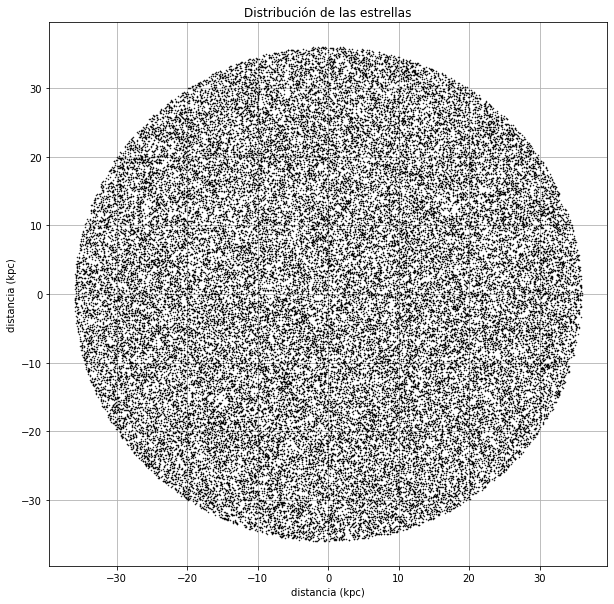

In [3]:
#gráfica
plt.figure(figsize=(10,10))
plt.plot(x,y, 'ko', markersize=0.5)
plt.title("Distribución de las estrellas")
plt.xlabel("distancia (kpc)")
plt.ylabel("distancia (kpc)")
plt.grid()

(b) Usando la distribución estelar generada en **a**, calcule el flujo $F_{ISM}$ (en $erg \ s^{-1} \ cm^{-2}$) de todas las estrellas tipo $O$ sobre cada uno de los puntos ubicados entre el centro de la Vía Láctea ($r=0$) y el borde ($r = 36 kpc$) a intervalos de $2 kpc$. Con estos resultados haga una gráfica de $F_{ISM}$ vs $r$. Pista: Los flujos deberían dar por el orden de $10^{-2} \ erg \ s^{-1} \ cm^{-2}$

Para este punto usamos la ecuación en donde:
\begin{equation}
L = 4\pi r^2 F \rightarrow F = \frac{L}{4\pi r^2}
\end{equation}

Ahora convirtamos el flujo en una sumatoria:
\begin{equation}
\Sigma_{r=0}^{36}F = \Sigma_{r=0}^{36}\frac{L}{4\pi r^2}
\end{equation}
> $F$:flujo, $L$:luminosidad de la estrella y $r$:distancia de la estrella

In [79]:
#convertimos los parsecs a cm

rint = 2*9.223e+18 #cm
rfinal = 38*9.223e+18 #cm

#limites de los bordes e intervalos
rango = np.arange(0,rfinal,rint)
rango1 = np.arange(0,38,2)

#arreglos vacios para la sumatoria
F = np.zeros(len(rango))
FISM = np.zeros(len(rango))

#sumatoria
for i,j in enumerate(rango):
    F[i] = L_O/(4*np.pi*j**2)
    FISM[i] += F[i-1] + F[i]
    
print(f"los flujos individuales:{F}, todos los valores en erg s^-1 cm^-2")

los flujos individuales:[       inf 2.33876038 0.58469009 0.25986226 0.14617252 0.09355042
 0.06496557 0.0477298  0.03654313 0.02887358 0.0233876  0.0193286
 0.01624139 0.01383882 0.01193245 0.01039449 0.00913578 0.0080926
 0.0072184 ], todos los valores en erg s^-1 cm^-2


/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


In [80]:
print(f"las sumas de los flujos de las estrellas:{FISM}, todos los valores en erg s^-1 cm^-2")

las sumas de los flujos de las estrellas:[       inf        inf 2.92345047 0.84455236 0.40603479 0.23972294
 0.15851598 0.11269537 0.08427293 0.06541672 0.05226119 0.0427162
 0.03556999 0.03008021 0.02577127 0.02232694 0.01953027 0.01722838
 0.01531099], todos los valores en erg s^-1 cm^-2


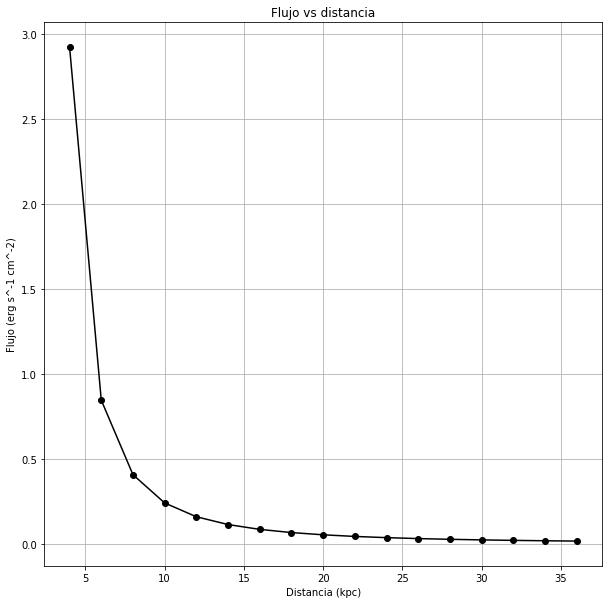

In [81]:
#gráfica
plt.figure(figsize=(10,10))
plt.plot(rango1,FISM, 'ko-')
plt.title("Flujo vs distancia")
plt.xlabel("Distancia (kpc)")
plt.ylabel("Flujo (erg s^-1 cm^-2)")
plt.grid()

(c) Repita el punto anterior ahora considerando una extinción por unidad de distancia $A_{\lambda}/D$ de $1.6 \ mag \ kpc^{-1}$

Con la aparicion de una extinción afecta nuestro flujo, porque aparece la profundidad opitca. Entonces primero se debe de calcular la profunidad optica:
\begin{equation}
A = (2.5\log{e})\tau
\end{equation}
> $A$: la extinción y $\tau$: la profundidad optica

Despejamos obtenemos que:
\begin{equation}
\tau = \frac{A}{2.5\log{e}}
\end{equation}

In [7]:
#obtener tau
A = 1.6

tau = A/(2.5*np.log10(np.e))

print(f"El valor de la profunidad optica es: {tau}")

El valor de la profunidad optica es: 1.4736544595161893


Ahora con la profundidad optica sabemos que la luminosidad de una estrella caera exponencialmente:
\begin{equation}
L = L_o e^{-\tau}
\end{equation}
Entonces con esto en mente reemplazamos nuestra luminosidad del punto anterior y así tenemos que:
\begin{equation}
 F = \frac{L_{O^*} e^{-\tau}}{4\pi r^2} \rightarrow \Sigma_{r=0}^{36}F = \Sigma_{r=0}^{36}\frac{L_{O^*} e^{-\tau}}{4\pi r^2}
\end{equation}

In [77]:
#convertimos los parsecs a cm

rint = 2*9.223e+18 #cm
rfinal = 38*9.223e+18 #cm

#limites de los bordes e intervalos
rango = np.arange(0,rfinal,rint)
rango1 = np.arange(0,38,2)

#arreglos vacios para la sumatoria
F = np.zeros(len(rango))
FISM = np.zeros(len(rango))

#sumatoria
for i,j in enumerate(rango):
    F[i] = (L_O*np.exp(-tau))/(4*np.pi*j**2)
    FISM[i] += F[i-1] + F[i]
    
print(f"los flujos individuales:{F}, todos los valores en erg s^-1 cm^-2")
print(f"las sumas de los flujos de las estrellas:{FISM}, todos los valores en erg s^-1 cm^-2")

los flujos individuales:[       inf 0.53577905 0.13394476 0.05953101 0.03348619 0.02143116
 0.01488275 0.01093427 0.00837155 0.00661456 0.00535779 0.00442793
 0.00372069 0.00317029 0.00273357 0.00238124 0.00209289 0.00185391
 0.00165364], todos los valores en erg s^-1 cm^-2
las sumas de los flujos de las estrellas:[       inf        inf 0.66972381 0.19347577 0.0930172  0.05491735
 0.03631391 0.02581702 0.01930581 0.0149861  0.01197235 0.00978572
 0.00814861 0.00689098 0.00590386 0.00511481 0.00447413 0.00394679
 0.00350755], todos los valores en erg s^-1 cm^-2


/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


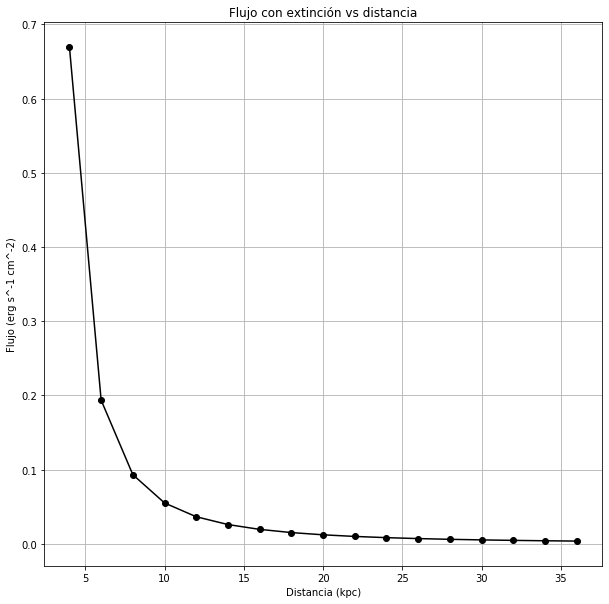

In [78]:
#gráfica
plt.figure(figsize=(10,10))
plt.plot(rango1,FISM, 'ko-')
plt.title("Flujo con extinción vs distancia")
plt.xlabel("Distancia (kpc)")
plt.ylabel("Flujo (erg s^-1 cm^-2)")
plt.grid()

 #### Comparando gráficas del punto **b** y **c**

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


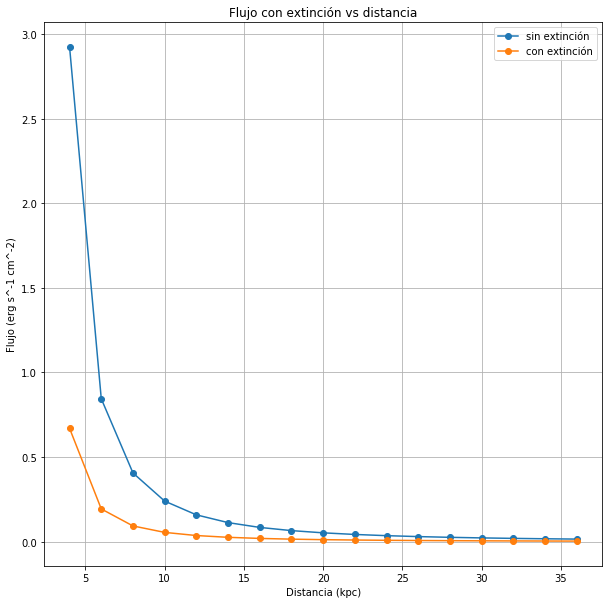

In [82]:
#sumatoria
F = np.zeros(len(rango))
FISM = np.zeros(len(rango))
Ft = np.zeros(len(rango))
FISMt = np.zeros(len(rango))
for i,j in enumerate(rango):
    F[i] = L_O/(4*np.pi*j**2)
    FISM[i] += F[i-1] + F[i]
    Ft[i] = (L_O*np.exp(-tau))/(4*np.pi*j**2)
    FISMt[i] += Ft[i-1] + Ft[i]
    

#gráfica
plt.figure(figsize=(10,10))
plt.plot(rango1,FISM, 'o-', label='sin extinción')
plt.plot(rango1,FISMt, 'o-', label='con extinción')
plt.title("Flujo con extinción vs distancia")
plt.xlabel("Distancia (kpc)")
plt.ylabel("Flujo (erg s^-1 cm^-2)")
plt.grid()
plt.legend()

Podemos observar que hay una clara diferencia de flujos cuando hay una extención, sin embargo podemos apreciar que a medida que se van alejando (teniendo un $r$ cada vez mayor) se puede notar que el flujo de los dos tendrá misma tendencia a cero

(d) Usando los resultados de **c**, y teniendo en cuenta que la temperatura de estas estrellas es $T_{O^*} \approx 4 \times 10^{4}°K$, calcule la energía promedio de los fotones y el número de fotones por unidad de área por unidad de tiempo (flujo de fotones) en el vecindario solar ($r \approx 8 \ kpc$). Su respuesta debería estar cerca del valor medido en el medio interstelar ($10^8 \ fotones \ cm^{-2} \ s^{-1}$)
>https://advances.sciencemag.org/content/3/9/eaao2538.full

El Caclulo de la energía del fotón se da por la ecuación:
\begin{equation}
E = \frac{hc}{\lambda}
\end{equation}
> siendo $h$: la constante de Planck, $c$: la velocidad de la luz y $\lambda$: la longitud de onda máxima del cuerpo negro del fotón.

Ya que tenemos la temperatura de la estrella podemos obtener la longitud de onda del fotón usando el *Wien displacement law* y de está manera su energía:

\begin{equation}
\lambda T = b \rightarrow \lambda = \frac{b}{T}
\end{equation}
> siendo $T$: la temperatura de la estrella y $b$: una consante que vale $0.0028978°K \ m$

In [67]:
#cálculo de lambda
T_O = 4e+4 #°K
b = 0.0028978 #°K m
lamb = b/T_O

#energía del fotón
h = 6.63e-34 #J s
c = 3e+8 #m/s
E = h*c/lamb #J

print(f"La longitud de onda que emite la estrella es de {lamb*1e+9} nm")
print(f"La energía del fotón es de {E} J")

La longitud de onda que emite la estrella es de 72.445 nm
La energía del fotón es de 2.7455310925529713e-18 J


Ahora con la energía calculada lo pasamos de $J$ a $erg$ para luego dividirlo con el flujo de la estrella y así obtener el flujo de fotones:
\begin{equation}
n_{fotones} = \frac{F}{E}
\end{equation}

In [108]:
#conversion de J a erg
Ej = E*1e+7 #erg

#Flujo del vecindario r = 8kpc
flux = FISMt[4] #erg s^-1 cm^2

#número de fotones
n = flux/Ej

print(f"El flujo de fotónes es de {n/1e+8}*10^8 fotones cm^-2 s^-1")

El flujo de fotónes es de 33.87949105056506*10^8 fotones cm^-2 s^-1


(e) El flujo $F_{ISM}$ del campo interstelar de radiación calienta los granos de polvo en el medio interstelar hasta cierta temperatura de equilibrio $T_g$. En promedio estos granos tienen un tamaño $a \approx 0.1 \mu m$. Si cada grano de polvo fuera un cuerpo negro, reemitiría la radiación absorbida con un pico de emisión en $\lambda_g = \lambda_{Wien}(T_g)$ según la Ley de Stefan-Boltzmann ($F_{SB} = \sigma T_g^4$). Dado que esta radiación es infraroja ($\lambda_g > 2\pi a$) se cumple que $Q_{\lambda} \approx 2\pi a/\lambda_{g}$(teoría de Mie). Esto significa que el flujo emitido por el polvo no es exactamente el de un cuerpo negro sino que será modulado por $Q_{\lambda}$, de manera que $F_{em} = F_{SB}Q_{\lambda}$. Suponiendo que los granos de polvo emiten toda la radiación absorbida ($F_{em} = F_{abs}$) $= F_{ISM}$, encuentre la temperatura de equilibrio $T_g$ para los granos de polvo en el medio interestelar para cada uno de los valores de $F_{ISM}$ del numeral **c**, y haga una gráfica de $T_g$ vs $r$ con los resultados. Pista: Deberían dar por el orden de $10°K$.

Según lo anterior en resumen tengo que el flujo emitido es igual a $F_{ISM}$ de está manera:
\begin{equation}
F_{ISM} = F_{SB}Q_{\lambda} \rightarrow F_{ISM} = \sigma T_{g}^4Q_{\lambda} \rightarrow 
F_{ISM} = \sigma T_{g}^4\frac{2\pi a}{\lambda_g} \rightarrow F_{ISM} = \sigma T_{g}^4\frac{2\pi a}{\lambda_{Wien}(T_g)} \rightarrow F_{ISM} = \sigma T_{g}^5\frac{2\pi a}{b} \rightarrow T_g = \sqrt[5]{\frac{bF_{ISM}}{2\pi\sigma a}}
\end{equation}
> $\lambda_{Wien}(T_g) = \frac{b}{T_g}$

Y de está manera es como se calcula la temperatura de equilibrio del polvo que se emite

In [117]:
#Conversión de dimensiones iguales
f = FISMt/(1e+7*10000) #erg s^-1 cm^-2 a J s^-1 m^-2 ó W m^-2
a = 0.1/1e+12 #pico m a m
#constantes
sigma = 5.67e-8 #W m^-2 °K^-4
b = 0.0028978 #°K m

#temperatura
T_g = ((b*f)/(sigma*2*np.pi*a))**(1/5)
print(f"Las temperaturas de equilibrio de FISM del punto c son:{T_g} en °K")

Las temperaturas de equilibrio de FISM del punto c son:[        inf         inf 14.03589932 10.94930143  9.45744327  8.51143947
  7.83566223  7.31884097  6.90555708  6.56445754  6.27620258  6.02808854
  5.81136086  5.61975354  5.44864182  5.29452426  5.15469247  5.02701268
  4.90977699] en °K


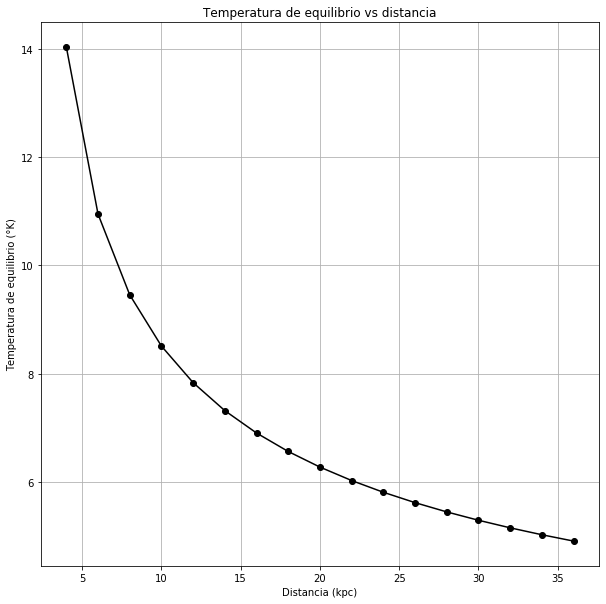

In [119]:
#gráfica
plt.figure(figsize=(10,10))
plt.plot(rango1,T_g, 'ko-')
plt.title("Temperatura de equilibrio vs distancia")
plt.xlabel("Distancia (kpc)")
plt.ylabel("Temperatura de equilibrio (°K)")
plt.grid()

Viendo la gráfica vemos que los granos de polvo que están más lejos del medio interestelar su temperatura de equilibrio será más baja ya que el flujo también es bajo (la temperatura de equilibrio y el flujo del campo interestelar son directamente proporcionales)